In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import ast


In [37]:
means = pd.read_csv("cofactor_expression/mean_expression.csv").set_index("tissueSiteDetailId").T
medians = pd.read_csv("cofactor_expression/median_expression.csv").set_index("tissueSiteDetailId").T
stds = pd.read_csv("cofactor_expression/std_expression.csv").set_index("tissueSiteDetailId").T
counts = pd.read_csv("cofactor_expression/counts_expression.csv").set_index("tissueSiteDetailId").T
GTEXmapper = pd.read_csv("helperfiles/mapper_GTEXcode.csv")
cofactors = pd.read_csv("helperfiles/cofactors_mapped_combined.csv")

In [55]:
cofactors_select = cofactors[["Gene Name", "Complex", "Subcomplex or Module", "UniprotID"]]
merged = cofactors_select.merge(GTEXmapper, on="UniprotID")
merged.head()

,Gene Name,Complex,Subcomplex or Module,UniprotID,Bgee,GeneID,Gene Names,GTEXGeneCode
0,BAF180,BAF,esBAF,Q86U86,ENSG00000163939,55193.0,"['PBRM1', 'BAF180', 'PB1']",ENSG00000163939.18
1,BAF180,BAF,npBAF,Q86U86,ENSG00000163939,55193.0,"['PBRM1', 'BAF180', 'PB1']",ENSG00000163939.18
2,BAF180,BAF,nBAF,Q86U86,ENSG00000163939,55193.0,"['PBRM1', 'BAF180', 'PB1']",ENSG00000163939.18
3,BCL11A,BAF,esBAF,Q9H165,ENSG00000119866,53335.0,"['BCL11A', 'CTIP1', 'EVI9', 'KIAA1809', 'ZNF856']",ENSG00000119866.20
4,BCL11A,BAF,npBAF,Q9H165,ENSG00000119866,53335.0,"['BCL11A', 'CTIP1', 'EVI9', 'KIAA1809', 'ZNF856']",ENSG00000119866.20


In [60]:
GTEXmappermain = merged[["GTEXGeneCode", "Gene Name", "Complex", "Subcomplex or Module"]]
grouped = GTEXmappermain.groupby("GTEXGeneCode").agg(list)
grouped_count = GTEXmappermain.groupby("GTEXGeneCode").agg(len)
grouped[grouped_count["Gene Name"] > 1]

,Gene Name,Complex,Subcomplex or Module
GTEXGeneCode,,,
ENSG00000028310.17,"[BRD9, BRD9, BRD9, BRD9]","[BAF, BAF, BAF, Chromatin Remodelers]","[esBAF, npBAF, nBAF, nan]"
ENSG00000049618.22,"[BAF250B, BAF250B, ARID1B]","[BAF, BAF, Chromatin Remodelers]","[npBAF, nBAF, nan]"
ENSG00000066117.14,"[BAF60A, BAF60A, BAF60A, SMARCD1]","[BAF, BAF, BAF, Chromatin Remodelers]","[esBAF, npBAF, nBAF, nan]"
ENSG00000073584.18,"[BAF57, BAF57, BAF57, SMARCE1]","[BAF, BAF, BAF, Chromatin Remodelers]","[esBAF, npBAF, nBAF, nan]"
ENSG00000080503.22,"[BRM, BRM]","[BAF, BAF]","[npBAF, nBAF]"
ENSG00000082014.16,"[BAF60C, BAF60C, SMARCD3]","[BAF, BAF, Chromatin Remodelers]","[npBAF, nBAF, nan]"
ENSG00000099385.11,"[BCL7C, BCL7C, BCL7C]","[BAF, BAF, BAF]","[esBAF, npBAF, nBAF]"
ENSG00000099956.18,"[BAF47, BAF47, BAF47, SMARCB1]","[BAF, BAF, BAF, Chromatin Remodelers]","[esBAF, npBAF, nBAF, nan]"
ENSG00000106635.7,"[BCL7B, BCL7B, BCL7B]","[BAF, BAF, BAF]","[esBAF, npBAF, nBAF]"


In [ ]:
GTEXmappermain = merged[["GTEXGeneCode", "Gene Name", "Complex", "Subcomplex or Module"]]
grouped = GTEXmappermain.groupby("GTEXGeneCode").agg(lambda x: list(set(x.to_list())))
grouped["Gene Name"] = grouped["Gene Name"].apply(lambda x: x[0])

def flatten_and_clean(input_list):
    output_list = []
    
    for item in input_list:
        # If the item is a list, recursively flatten it
        if isinstance(item, list):
            output_list.extend(flatten_and_clean(item))  # Recursion to flatten sublists
        # If the item is NaN, skip it
        elif isinstance(item, float) and math.isnan(item):
            continue
        else:
            output_list.append(item.replace("[", "").replace("]", ""))
        
    return output_list

grouped["Subcomplex or Module"] = grouped["Subcomplex or Module"].apply(flatten_and_clean)

grouped.head()

,Gene Name,Complex,Subcomplex or Module
GTEXGeneCode,,,
ENSG00000005075.15,POLR2J,[RNA Pol II],[]
ENSG00000005339.14,CREBBP,[P300-CBP],[CBP]
ENSG00000006712.14,PAF1,[Elongation],[]
ENSG00000008838.19,MED24,[Mediator],[Tail]
ENSG00000011007.12,ELOA,[Elongation],[]


In [ ]:
for x in grouped["Subcomplex or Module"]:
    d

GTEXGeneCode
ENSG00000005075.15       [nan]
ENSG00000005339.14       [CBP]
ENSG00000006712.14       [nan]
ENSG00000008838.19    [[Tail]]
ENSG00000011007.12       [nan]
                        ...   
ENSG00000198730.7        [nan]
ENSG00000204356.13       [nan]
ENSG00000205683.11      [nBAF]
ENSG00000213246.6        [nan]
ENSG00000272333.5        [nan]
Name: Subcomplex or Module, Length: 180, dtype: object

In [ ]:
medianslogged = np.log(medians)
mapped = medianslogged.merg

tissueSiteDetailId,Thyroid,Testis,Small_Intestine_Terminal_Ileum,Skin_Not_Sun_Exposed_Suprapubic,Brain_Frontal_Cortex_BA9,Fallopian_Tube,Bladder,Vagina,Whole_Blood,Brain_Amygdala,...,Cells_Cultured_fibroblasts,Artery_Aorta,Brain_Putamen_basal_ganglia,Kidney_Medulla,Lung,Kidney_Cortex,Brain_Substantia_nigra,Cervix_Endocervix,Skin_Sun_Exposed_Lower_leg,Cervix_Ectocervix
ENSG00000156603.15,24.568188,40.818892,12.382727,18.969790,18.651383,16.431111,14.847857,18.001205,3.950447,10.275625,...,30.697103,16.352194,9.919132,15.59250,14.536884,11.393788,8.445647,20.584,19.766358,17.146444
ENSG00000196235.13,121.514089,223.366537,84.346310,79.064487,69.393732,103.833333,85.020476,81.518141,38.502097,44.261711,...,86.735377,97.634097,52.321073,60.70750,90.890329,48.723176,45.647194,113.676,82.009643,102.322222
ENSG00000117713.18,42.796968,35.025762,30.372406,29.240778,12.352139,34.871111,31.415714,30.997756,13.207897,9.427105,...,25.710522,28.651713,8.899980,15.86475,31.159377,11.941247,9.309216,34.225,30.245407,30.628889
ENSG00000153922.10,17.311040,27.140970,18.650674,15.440437,3.882278,23.737778,14.756429,16.569609,11.941954,3.339749,...,16.954022,14.636563,2.943141,9.90275,24.783346,7.192318,3.835403,21.626,14.217996,19.146778
ENSG00000167548.14,30.056824,22.063659,19.759829,21.701490,7.773766,24.927778,17.715762,17.846231,10.046682,4.681927,...,20.140407,17.172907,4.586010,9.98025,23.559445,8.129635,4.687191,23.083,23.609097,19.438889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000108590.10,21.300632,30.476343,13.294492,18.687018,19.069483,21.034444,14.410429,19.661660,7.301846,10.690658,...,25.938512,15.307535,10.331644,14.18250,15.658393,10.178553,9.630295,19.959,17.768067,19.167222
ENSG00000196367.12,21.228942,26.860360,15.167465,18.394690,7.233067,20.151111,15.011381,15.201891,3.715791,4.454185,...,24.808175,14.828150,5.187165,7.61875,15.550953,7.418800,4.465424,21.105,20.418325,18.368889
ENSG00000092201.9,48.770168,74.477147,44.908182,46.103162,29.373268,63.585556,54.048571,53.133269,12.241341,15.182507,...,95.626270,48.393148,16.050698,25.65250,41.631107,19.418024,17.738094,73.580,50.130300,67.412222
ENSG00000162227.7,29.226701,15.118479,16.872112,18.595488,10.583880,23.786667,19.142476,16.934647,4.989084,7.969829,...,15.272750,15.649324,7.824624,14.45125,15.886152,12.539471,8.125201,27.040,19.187170,22.680000


<Axes: xlabel='tissueSiteDetailId'>

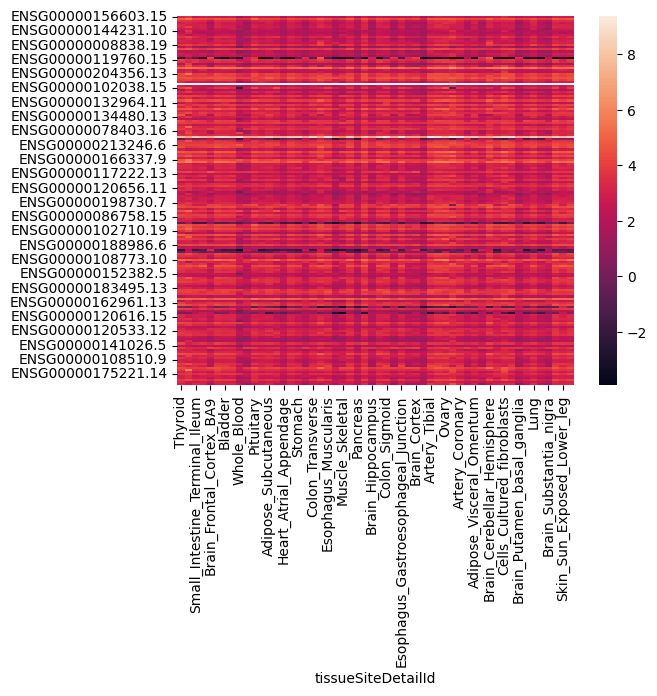

In [ ]:
sns.heatmap()